In [19]:
import numpy as np
import seaborn as sns
from cycler import cycler
import matplotlib.pyplot as plt

In [2]:
from distgen import Generator
from distgen.writers import *
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.plot import marginal_plot

In [6]:
plt.rc('axes',labelsize=14)
plt.rc('axes', axisbelow=True)

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('font', family='STIXGeneral')
plt.rc('mathtext', fontset='stix')
plt.rc('legend', fontsize='14')

default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rc('lines', linewidth=4)
custom_cycler = (cycler(color=['c', 'm', 'y', 'k']) +
                 cycler(lw=[1, 2, 3, 4]))

#plt.rc('axes', prop_cycle=default_cycler)
plt.rc('axes', prop_cycle=custom_cycler)

In [12]:
def parse_opal_emitted_dist(filename, names=['x', 'px','y','py','t','pz']):
    '''Read in particle distribution used 
    in OPAL-T simulation. Used to describe the 
    beam distribution as it leaves the cathode.'''
    dist = {}
    data = np.loadtxt(filename, skiprows=1)
    for i,name in enumerate(names):
        dist[name] = data[:,i]
    return dist

In [10]:
gyaml = '../sc_files/tgauss.yaml'
dist  = Generator(input_file=gyaml, verbose=True)
dist.run()
particles = dist.particles
particles.write_opal('opal_emitted_test.txt', dist_type= 'emitted')

Distribution format: None
Output file: None

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 100 pC.
   Number of macroparticles: 50000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 0.5 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Gaussian
      avg_t = 0 ps, sigma_t = 8.500 ps
      Left n_sigma_cutoff = 3, Right n_sigma_cutoff = -3
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 410.645 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 410.645 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 410.645 eV/c
   Shifting avg_x = -1.7E-05 mm -> 0 mm
   Scaling sigma_x = 0.249986 mm -> 0.25 mm
   Shifting avg_y = -1.94065E-06 mm -> 0 mm
   Scaling sigma_y = 0.249998 mm -> 0.25 mm
   Shifting avg_px = -0.0844707 eV/c -> 0 eV/c
   Scaling sigma_px = 410.623 eV/c -> 410.645 eV/c
   Shifting avg_py 

opal_emitted_test
-0.4995227461181


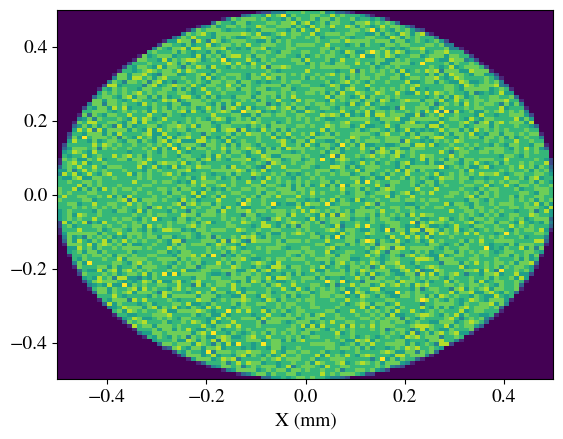

In [15]:
for filename in ['opal_emitted_test.txt']:#, nofilter, p1000fs]:
    data = parse_opal_emitted_dist(filename)
    ext  = filename.split('.')[0]
    print(ext)
    plt.hist2d(data['x']*10**3, data['y']*10**3, bins=100) #, color='indigo', stat='count', bins=500,alpha=0.1, kde=True)
    #plt.ylim(-0.6, 0.6)
    print(min(data['x'])*10**3)
    plt.xlabel('X (mm)')
    #plt.savefig(ext+'.pdf', bbox_inches='tight', dpi=300)
    plt.show()

opal_emitted_test


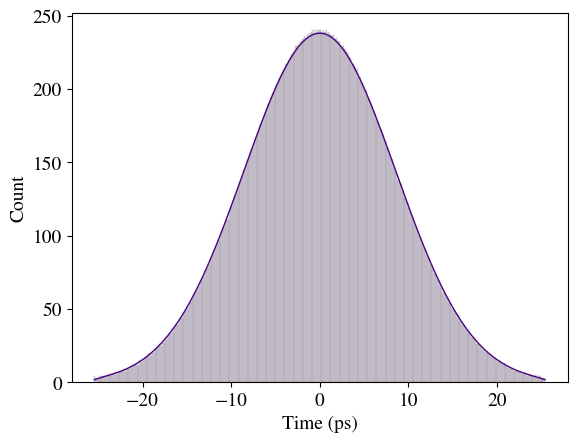

In [20]:
for filename in ['opal_emitted_test.txt',]:# nofilter, p1000fs, gauss]:
    data = parse_opal_emitted_dist(filename)
    ext  = filename.split('.')[0]
    ext  = ext.split('/')[-1]
    print(ext)
    sns.histplot(data['t']*10**12, color='indigo', stat='count', bins=500,alpha=0.1, kde=True)
    plt.xlabel('Time (ps)')
    plt.savefig(ext+'.pdf', bbox_inches='tight', dpi=300)
    plt.show()

fwhm in ps 20.22525591265944
fwhm in sigmat 8.588219071192967e-12


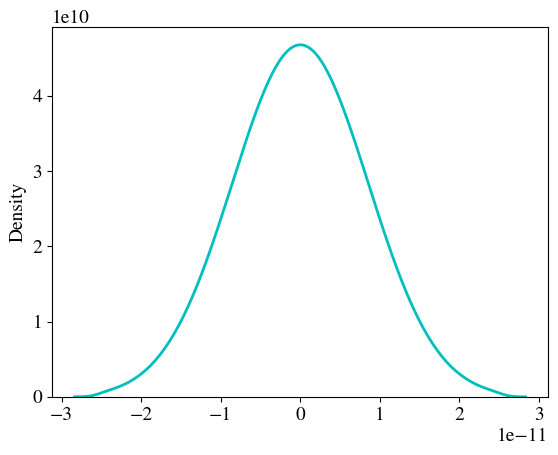

In [24]:
ax = sns.kdeplot(data['t'])
kde_curve = ax.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
halfmax = y.max() / 2
maxpos = y.argmax()
leftpos = (np.abs(y[:maxpos] - halfmax)).argmin()
rightpos = (np.abs(y[maxpos:] - halfmax)).argmin() + maxpos
fwhm = x[rightpos] - x[leftpos]

print('fwhm in ps', fwhm*10**12)
print('fwhm in sigmat', fwhm/2.355) 

In [25]:
8.5*2.355


20.0175